In [116]:
import numpy as np;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# a = np.random.randint(1,10,16*4)
a = np.zeros(64)
a.fill(0.1)
a[0] = 0.5
a[16] = 1.0
a[40] = 0.7
a[63] = 0.6
print(a)

[0.5 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 1.  0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.7 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.6]


d_syn[j_n] = syn[i_n] * (syn_len / (j_n - i_n)**N )

In [430]:
a_idx = np.arange(a.size)
n = 1.5
# n = 1/n
# a_len = a.size**n - np.abs(a_idx[np.newaxis].T - a_idx)**n
# a_len = np.exp(-np.abs(a_idx[np.newaxis].T - a_idx))
a_len = np.abs(a_idx[np.newaxis].T - a_idx)
a_len = (np.array(a_len, dtype='float') + 1) ** -n
# a_len = np.max(a_len) - a_len
# np.fill_diagonal(a_len, 0)
print(a_len.max(), a_len.min(), a_len.max() / a_len.min())

d_a = np.dot(a, a_len)
print(d_a.min())
d_a -= np.min(d_a)


1.0 0.001953125 512.0
0.3624034725296629


<AxesSubplot: ylabel='0'>

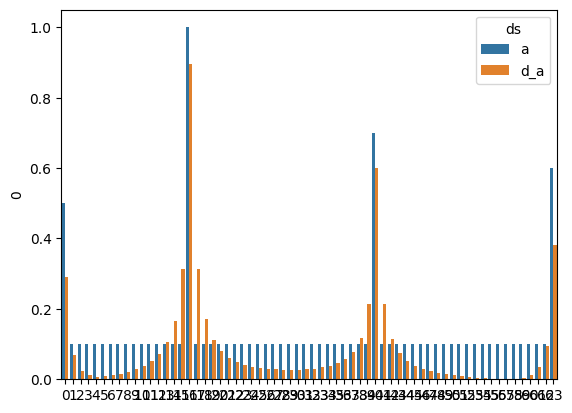

In [431]:
# print(a)
# print(d_a)

# sns.barplot(x=np.arange(a.size), y=a, color='red')
# my_array = np.array([np.arange(a.size), a, d_a]).T
# print(my_array)
# df = pd.DataFrame(my_array, columns = ['A','B','C'])
# sns.barplot(data=df, x='A', y='C', hue='A', palette=['blue', 'red'])

ds1 = pd.DataFrame(a/np.max(a))
ds2 = pd.DataFrame(d_a) # /np.max(d_a)   - np.min(d_a)
ds1['ds'] = 'a'
ds2['ds'] = 'd_a'
dss = pd.concat([ds1, ds2])
sns.barplot(x=dss.index, y=dss[0], hue='ds', data=dss)

[[5.00000000e-01 3.53553391e-02 1.92450090e-02 ... 2.04838915e-04
  1.99981203e-04 1.17187500e-03]
 [1.76776695e-01 1.00000000e-01 3.53553391e-02 ... 2.09896524e-04
  2.04838915e-04 1.19988722e-03]
 [9.62250449e-02 3.53553391e-02 1.00000000e-01 ... 2.15165741e-04
  2.09896524e-04 1.22903349e-03]
 ...
 [1.02419457e-03 2.09896524e-04 2.15165741e-04 ... 1.00000000e-01
  3.53553391e-02 1.15470054e-01]
 [9.99906013e-04 2.04838915e-04 2.09896524e-04 ... 3.53553391e-02
  1.00000000e-01 2.12132034e-01]
 [9.76562500e-04 1.99981203e-04 2.04838915e-04 ... 1.92450090e-02
  3.53553391e-02 6.00000000e-01]]


<AxesSubplot: ylabel='0'>

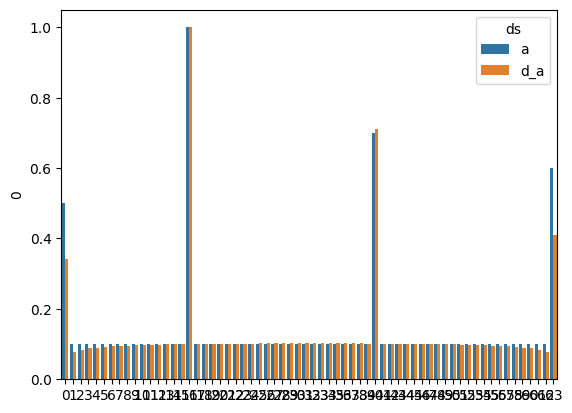

In [432]:
a_mul = a * a_len
print(a_mul)
d_a = np.sum(a_mul, axis=0)
ds1 = pd.DataFrame(a/np.max(a))
ds2 = pd.DataFrame(d_a/np.max(d_a))
ds1['ds'] = 'a'
ds2['ds'] = 'd_a'
dss = pd.concat([ds1, ds2])
sns.barplot(x=dss.index, y=dss[0], hue='ds', data=dss)

In [433]:
def get_dW(W, n = 1):
    a_idx = np.arange(W.size)
    a_len = W.size**n - np.abs(a_idx[np.newaxis].T - a_idx)**n
    np.fill_diagonal(a_len, 0)
    d_a = np.dot(W, a_len)

    return d_a

In [434]:
print(a)
dW = get_dW(a)
# print(dW / np.linalg.norm(dW))
print(dW)

[0.5 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 1.  0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.7 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.6]
[259.7 293.1 300.7 308.1 315.3 322.3 329.1 335.7 342.1 348.3 354.3 360.1
 365.7 371.1 376.3 381.3 328.5 388.9 391.5 393.9 396.1 398.1 399.9 401.5
 402.9 404.1 405.1 405.9 406.5 406.9 407.1 407.1 406.9 406.5 405.9 405.1
 404.1 402.9 401.5 399.9 359.7 394.9 391.5 387.9 384.1 380.1 375.9 371.5
 366.9 362.1 357.1 351.9 346.5 340.9 335.1 329.1 322.9 316.5 309.9 303.1
 296.1 288.9 281.5 241.9]
